In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Chronic_Kidney_disease_dataset.csv')
df.head(3)

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,female,50.0,1.02,4,4,normal,absent,absent,98.1,...,38.3,10132,5.8,yes,yes,yes,good,yes,no,1
1,44,female,90.4,1.01,1,0,normal,absent,absent,186.2,...,41.0,6703,6.0,yes,yes,no,good,yes,no,0
2,20,male,65.1,1.01,0,0,normal,absent,absent,201.3,...,36.5,6712,5.6,yes,no,no,good,no,no,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
blood_glucose_random,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30000 non-null  int64  
 1   gender                   30000 non-null  object 
 2   blood_pressure           30000 non-null  float64
 3   specific_gravity         30000 non-null  float64
 4   albumin                  30000 non-null  int64  
 5   sugar                    30000 non-null  int64  
 6   pus_cell                 30000 non-null  object 
 7   pus_cell_clumps          30000 non-null  object 
 8   bacteria                 30000 non-null  object 
 9   blood_glucose_random     30000 non-null  float64
 10  blood_urea               30000 non-null  float64
 11  serum_creatinine         30000 non-null  float64
 12  sodium                   30000 non-null  float64
 13  potassium                30000 non-null  float64
 14  hemoglobin            

In [ ]:
from sklearn.preprocessing import LabelEncoder

genders = ["Male", "Female", "Female", "Male", "Other"]
encoder = LabelEncoder()
encoded = encoder.fit_transform(genders)

print(encoded)        # [1 0 0 1 2]
print(encoder.classes_)  # ['Female' 'Male' 'Other']

[1 0 0 1 2]
['Female' 'Male' 'Other']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ohe=LabelEncoder()

In [ ]:
ohe.fit(df[['hypertension']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [ ]:
ohe.transform(df[['hypertension']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# Typically you'd have multiple categorical values
appetite_levels = [['good'], ['poor']]
ohe.fit_transform(appetite_levels)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 2)>

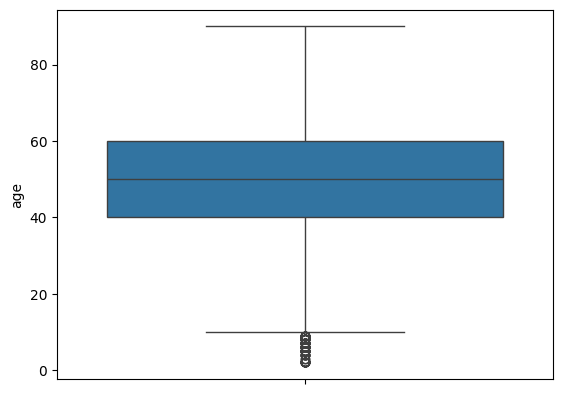

In [ ]:
sns.boxplot(df['age'])
plt.show()

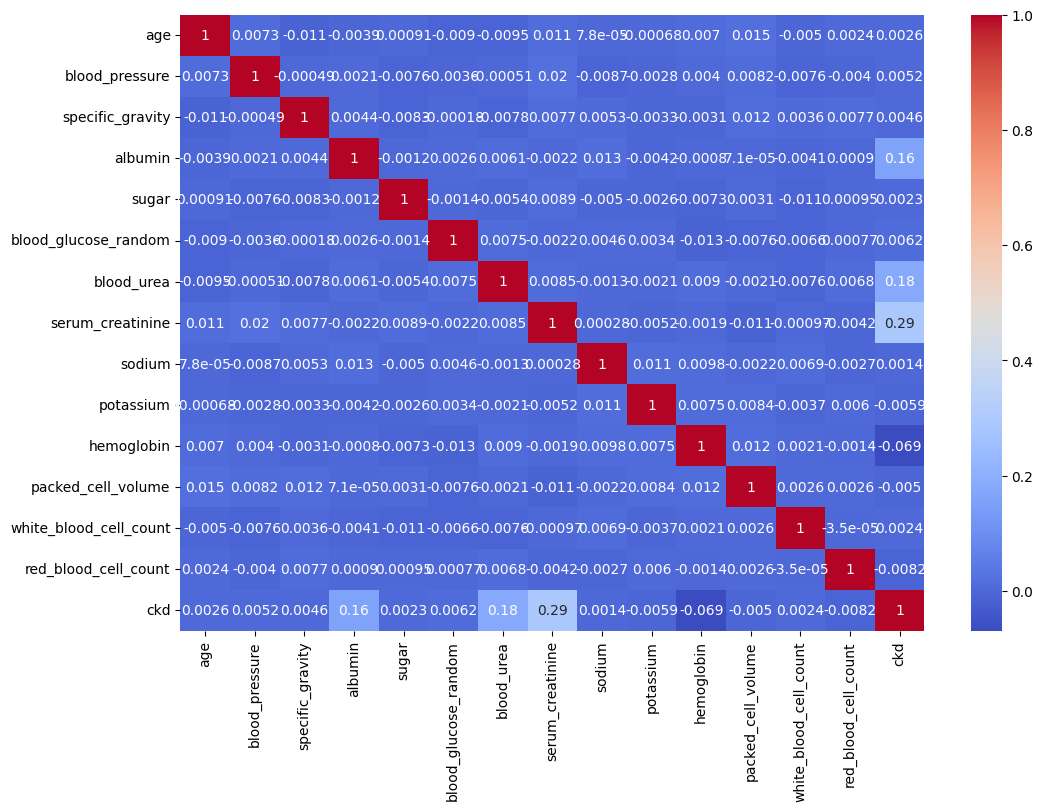

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.show()

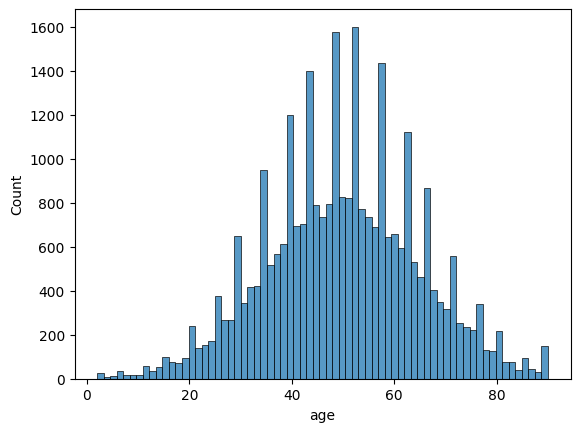

In [ ]:
sns.histplot(df['age'])
plt.show()

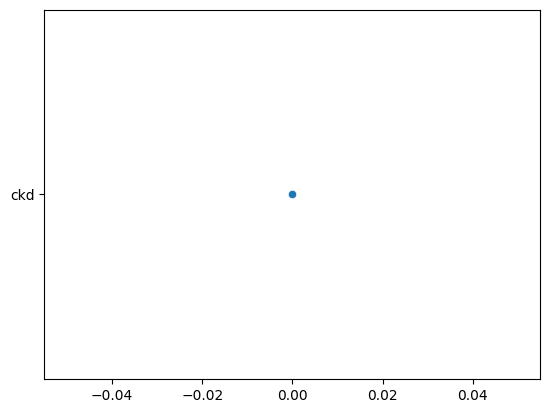

In [ ]:
sns.scatterplot('ckd')
plt.show()

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ckd
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,49.977067,80.676730,1.017245,2.417633,0.775133,123.433163,40.942673,2.083082,137.987707,4.505577,13.497323,41.991253,8486.678500,5.195840,0.165600
std,14.919311,18.929556,0.005613,1.461787,1.200479,54.003448,23.199416,1.333525,5.005188,0.700804,1.998484,5.011280,2461.036226,0.702358,0.371727
min,2.000000,50.000000,1.005000,0.000000,0.000000,50.000000,5.000000,0.300000,120.000000,2.500000,6.000000,25.000000,3000.000000,3.000000,0.000000
25%,40.000000,66.600000,1.015000,1.000000,0.000000,79.000000,23.300000,0.980000,134.600000,4.000000,12.100000,38.600000,6779.000000,4.700000,0.000000
50%,50.000000,80.200000,1.015000,2.000000,0.000000,119.700000,39.900000,1.980000,138.000000,4.500000,13.500000,42.000000,8462.000000,5.200000,0.000000
75%,60.000000,93.600000,1.020000,4.000000,1.000000,160.500000,56.700000,2.990000,141.400000,5.000000,14.800000,45.400000,10157.000000,5.700000,0.000000
max,90.000000,155.200000,1.025000,5.000000,5.000000,373.200000,135.600000,7.820000,155.000000,7.100000,20.000000,55.000000,18000.000000,7.500000,1.000000


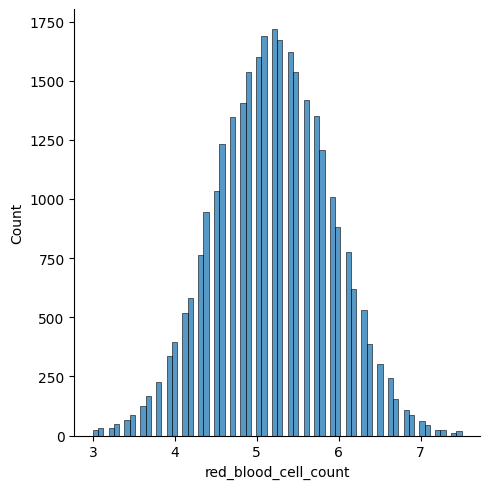

In [ ]:
sns.displot(df['red_blood_cell_count'])
plt.show()

In [ ]:
q1=df['red_blood_cell_count'].quantile(0.25)
q3=df['red_blood_cell_count'].quantile(0.75)
iqr=q3-q1

In [ ]:
min_val=q1-1.5*iqr
max_val=q3+1.5*iqr
min_val,max_val

(np.float64(3.2), np.float64(7.2))

/tmp/ipython-input-784182730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['red_blood_cell_count'])


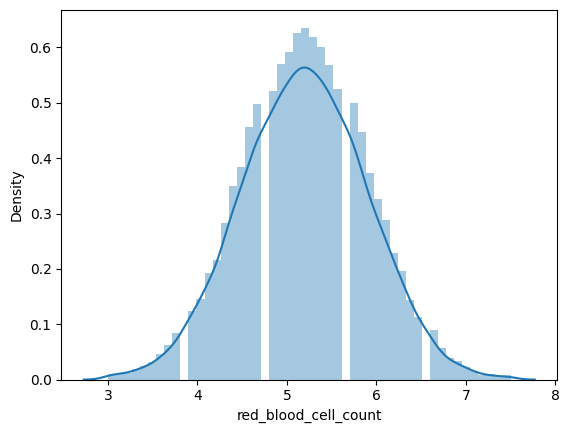

In [ ]:
sns.distplot(df['red_blood_cell_count'])
plt.show()

In [ ]:
df[df['red_blood_cell_count']<=max_val]

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,female,50.0,1.020,4,4,normal,absent,absent,98.1,...,38.3,10132,5.8,yes,yes,yes,good,yes,no,1
1,44,female,90.4,1.010,1,0,normal,absent,absent,186.2,...,41.0,6703,6.0,yes,yes,no,good,yes,no,0
2,20,male,65.1,1.010,0,0,normal,absent,absent,201.3,...,36.5,6712,5.6,yes,no,no,good,no,no,0
3,66,female,99.1,1.025,2,0,normal,absent,absent,151.9,...,38.1,5327,5.7,no,yes,yes,good,yes,no,0
4,54,male,70.2,1.020,1,0,normal,absent,absent,163.7,...,31.4,6573,3.9,yes,yes,no,good,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41,male,81.6,1.025,5,1,normal,present,absent,169.7,...,44.6,10646,4.6,yes,no,no,poor,yes,no,0
29996,42,female,81.7,1.025,2,1,normal,absent,absent,76.4,...,47.0,10273,5.2,no,no,no,good,no,yes,1
29997,37,male,79.2,1.015,2,0,normal,present,absent,103.4,...,33.8,9689,4.7,no,no,yes,good,no,no,0
29998,61,male,68.4,1.025,1,2,normal,absent,absent,191.3,...,48.7,6699,3.9,no,no,no,good,yes,no,0


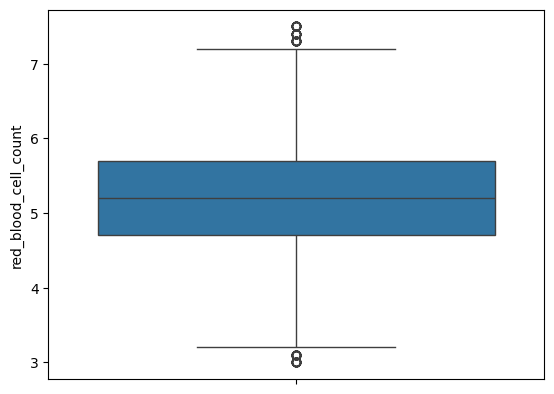

In [ ]:
sns.boxplot(df['red_blood_cell_count'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('ckd',axis=1)
y=df['ckd']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your data (replace this with your actual data loading)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# Encode categorical target variable if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9740
K-Nearest Neighbors Accuracy: 0.8133


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)

    # If model has predict_proba (needed for ROC)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = None


🔎 K-Nearest Neighbors Evaluation
----------------------------------------
Accuracy : 0.813
Precision: 0.25
Recall   : 0.046
F1-Score : 0.077

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      4974
           1       0.25      0.05      0.08      1026

    accuracy                           0.81      6000
   macro avg       0.54      0.51      0.49      6000
weighted avg       0.73      0.81      0.76      6000



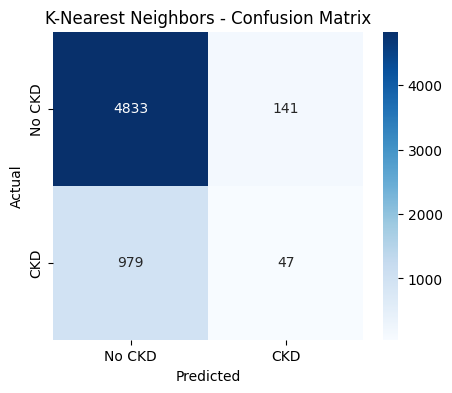

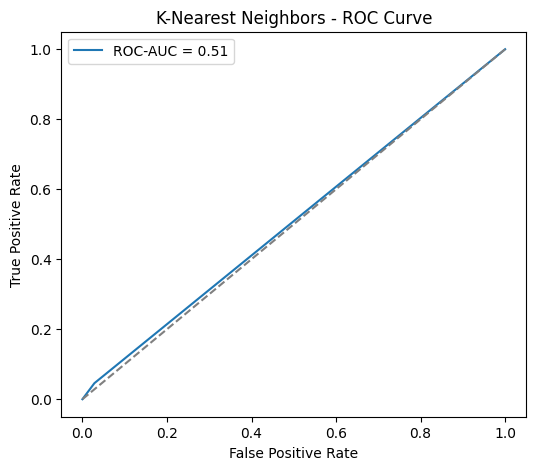

In [ ]:


    # --- Metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔎 {model_name} Evaluation")
    print("-" * 40)
    print("Accuracy :", round(acc, 3))
    print("Precision:", round(prec, 3))
    print("Recall   :", round(rec, 3))
    print("F1-Score :", round(f1, 3))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No CKD","CKD"], yticklabels=["No CKD","CKD"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # --- ROC Curve ---
    if y_pred is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"ROC-AUC = {auc:.2f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} - ROC Curve")
        plt.legend()
        plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,        # number of random combinations to try
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best CV Score: 0.9677083333333334
